In [229]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE

In [230]:
from astropy.io import fits
import pandas as pd

telescopes = ["Fermi", "Batse"]
normalize = True
telescopes_data = {"Fermi" : [],"Batse": []}

for telescope in telescopes :
    # Open the FITS file
    if telescope == "Fermi" :
        file_path = "../../datasets/fermi-gbm_batse.fits"  # Replace with your file path
    else :
        file_path = "../../datasets/batse.fits"  # Replace with your file path

    with fits.open(file_path) as hdul:
        hdul.info()  # Display information about the HDUs (Header Data Units)
        
        # Assume the data is in the first table HDU
        data = hdul[1].data

        # Convert to a Pandas DataFrame
        df = pd.DataFrame(data.tolist(), columns=data.names)
        telescopes_data[telescope].append(df)

    # Preview the DataFrame
    print(df.head())


Filename: ../../datasets/fermi-gbm_batse.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  FERMIGBRST    1 TableHDU       286   3982R x 48C   [A30, F8.4, F8.4, F15.7, F8.3, F6.3, F8.3, D10.4, D10.4, F9.4, F8.4, F8.3, F9.4, F9.4, D12.6, D12.6, D12.6, D12.6, D12.6, D12.6, D13.6, D12.6, D12.6, D13.6, D12.6, D12.6, F8.3, F8.3, A32, F6.3, A32, F6.3, A11, D10.4, F9.4, F9.4, F8.4, F8.4, F9.4, F8.4, F9.4, F8.4, D13.6, D12.6, D12.6, D12.6, D12.6, D12.6]   


                             NAME        RA      DEC  TRIGGER_TIME     T90  \
0  GRB120403857                     55.3384 -89.0093  56020.856927   4.288   
1  GRB120227725                    256.7300 -88.8600  55984.725475  17.408   
2  GRB230524357                     13.0800 -87.7700  60088.357309  11.008   
3  GRB141205018                    294.6100 -87.5800  56996.017706  13.056   
4  GRB180630467                     48.9589 -87.4785  58299.466602  12.032   

   T90_ERROR  T90_START       FLUENCE  FLUENCE_ERROR  FLUX_1024  ...  \
0      1.935     -3.968  2.396400e-07   2.045800e-08     1.7469  ...   
1      0.810      0.256  2.194900e-05   1.040300e-07    18.4653  ...   
2      4.720     -5.632  1.420100e-06   4.245700e-08     3.5503  ...   
3      1.280     -6.912  1.603100e-06   4.126700e-08     2.1505  ...   
4      1.864     -2.048  2.988000e-06   3.253700e-08     9.4128  ...   

   FLUX_BATSE_64  FLUX_BATSE_64_ERROR  FLUX_BATSE_256  FLUX_BATSE_256_ERROR  \
0         0.6028   

In [231]:
telescopes_data["Fermi"][0]

NAME        RA      DEC  TRIGGER_TIME     T90  \
0     GRB120403857                     55.3384 -89.0093  56020.856927   4.288   
1     GRB120227725                    256.7300 -88.8600  55984.725475  17.408   
2     GRB230524357                     13.0800 -87.7700  60088.357309  11.008   
3     GRB141205018                    294.6100 -87.5800  56996.017706  13.056   
4     GRB180630467                     48.9589 -87.4785  58299.466602  12.032   
...                              ...       ...      ...           ...     ...   
3977  GRB130528695                    138.7380  87.2700  56440.695421  55.553   
3978  GRB090813174                    225.8020  88.5687  55056.174104   7.552   
3979  GRB110201399                    137.5800  88.6054  55593.399424   8.192   
3980  GRB150309958                    277.1020  86.4287  57090.958225  52.481   
3981  GRB210624041                    119.3200  87.1100  59389.040547   0.304   

      T90_ERROR  T90_START       FLUENCE  FLUENCE_ERROR  FLUX_1024  ...  \
0         1.935     -3.968  2.396400e-07   2.045800e-08     1.7469  ...   
1         0.810      0.256  2.194900e-05   1.040300e-07    18.4653  ...   
2         4.720     -5.632  1.420100e-06   4.245700e-08     3.5503  ...   
3         1.280     -6.912  1.603100e-06   4.126700e-08     2.1505  ...   
4         1.864     -2.048  2.988000e-06   3.253700e-08     9.4128  ...   
...         ...        ...           ...            ...        ...  ...   
3977      1.864      0.576  1.109300e-05   1.202000e-07     5.6715  ...   
3978      0.362      0.384  3.325400e-06   4.154000e-08    13.6407  ...   
3979      0.870     -1.792  3.153600e-06   1.654100e-07     3.4705  ...   
3980      1.086      3.648  3.977000e-05   1.823900e-07    15.1628  ...   
3981      0.333     -0.032  3.798700e-07   2.017400e-08     3.5822  ...   

      FLUX_BATSE_64  FLUX_BATSE_64_ERROR  FLUX_BATSE_256  \
0            0.6028               0.2459          0.5473   
1           11.1926               1.4290          9.4569   
2            2.6118               0.4957          1.9492   
3            2.4750               0.6682          1.8923   
4            3.0549               0.5811          2.8763   
...             ...                  ...             ...   
3977         4.7233               0.6803          3.7264   
3978        15.1617               1.0988         10.0166   
3979         3.2791               0.9094          1.9609   
3980         8.7740               0.6622          7.9328   
3981         8.9562               1.1169          4.7000   

      FLUX_BATSE_256_ERROR  PFLX_PLAW_PHTFLUXB  PFLX_PLAW_PHTFLNCB  \
0                   0.1217            0.612078            0.624685   
1                   0.7040            5.468751            5.571816   
2                   0.2164            0.770761            0.789259   
3                   0.3238            0.743178            0.757713   
4                   0.2802            1.892598            1.927963   
...                    ...                 ...                 ...   
3977                0.3126            1.936309            1.975345   
3978                0.5339            2.393155            2.438229   
3979                0.4432            0.960630            0.977045   
3980                0.3328            4.873663            4.959485   
3981                0.4341            6.401224            0.409678   

      PFLX_PLAW_ERGFLNCB  PFLX_COMP_PHTFLUXB  PFLX_COMP_PHTFLNCB  \
0           1.241559e-07            0.919292            0.938227   
1           1.033743e-06            7.794289            7.941181   
2           1.556984e-07            1.191399            1.219992   
3           1.487775e-07            0.972716            0.991740   
4           3.447151e-07            2.130814            2.170631   
...                  ...                 ...                 ...   
3977        4.069566e-07            3.398385            3.466895   
3978        4.576766e-07            3.034633        

In [232]:
telescopes_data["Batse"][0]

TRIGGER_NUM                  NAME      RA    DEC              TIME  \
0          02052  4B 921112-             76.94 -88.95  48938.5320429815   
1          07980  GRB 000203            329.06 -88.40  51577.4359954792   
2          06405  GRB 970930-           270.24 -88.00  50721.9298574248   
3          03875  4B 951019             161.51 -87.81  50009.5583879815   
4          06497  GRB 971124            255.20 -87.10  50776.0163759433   
...          ...                   ...     ...    ...               ...   
2697       03282  4B 941113             197.82  86.19  49669.1342939063   
2698       03437  4B 950221-            204.22  86.80   49769.988431684   
2699       01982  4B 921008             257.61  87.18  48903.8802918715   
2700       03846  4B 951003              39.82  87.25  49993.3879576111   
2701       03085  4B 940716-            127.19  88.10  49549.5429768692   

       FLUX_64 FLUX_64_ERROR  FLUX_256 FLUX_256_ERROR FLUX_1024  ...  \
0                                                                ...   
1       2.4140       0.2203     1.8037        0.1031     0.5773  ...   
2       0.9132       0.1825     0.6315        0.0874     0.5812  ...   
3       3.0230       0.2260     2.8020        0.1120     2.1610  ...   
4       0.5406       0.1742     0.3749        0.0866     0.3114  ...   
...        ...           ...       ...            ...       ...  ...   
2697    3.0600       0.2240     0.9680        0.0870     0.2570  ...   
2698    0.9530       0.1880     0.6430        0.0910     0.1690  ...   
2699    1.7790       0.2600     1.6840        0.1290     1.6030  ...   
2700                                                             ...   
2701    1.5670       0.2500     1.3340        0.1220     0.8360  ...   

           T90 T90_ERROR     FLUENCE_1 FLUENCE_1_ERROR     FLUENCE_2  \
0                         0.000000e+00    0.000000e+00  0.000000e+00   
1        0.240     0.074  7.801300e-09    3.246900e-09  2.304100e-08   
2       30.144     3.567  3.213700e-07    1.840900e-08  3.993300e-07   
3        8.384     1.473  3.528600e-07    1.275900e-08  2.814800e-07   
4        3.328     0.730  1.462900e-08    6.020700e-09  2.592300e-08   
...        ...       ...           ...             ...           ...   
2697     0.078     0.014  3.441500e-09    1.591100e-09  9.727600e-09   
2698     0.344     0.064  1.415100e-09    2.907700e-09  1.088800e-09   
2699   109.824     6.177  6.943100e-07    2.845600e-08  1.848600e-06   
2700                      0.000000e+00    0.000000e+00  0.000000e+00   
2701    11.264     2.263  2.175500e-07    2.223600e-08  2.071300e-07   

      FLUENCE_2_ERROR     FLUENCE_3  FLUENCE_3_ERROR     FLUENCE_4  \
0        0.000000e+00  0.000000e+00     0.000000e+00  0.000000e+00   
1        3.471000e-09  1.007700e-07     9.493900e-09  8.380400e-08   
2        1.794100e-08  9.028400e-07     5.073200e-08  1.494800e-06   
3        8.874100e-09  3.213000e-07     1.920200e-08  1.247100e-07   
4        6.033500e-09  1.664800e-07     1.816800e-08  2.279300e-07   
...               ...           ...              ...           ...   
2697     1.743000e-09  4.809400e-08     4.884600e-09  9.472000e-08   
2698     3.205000e-09  4.833400e-08     8.987900e-09  8.925400e-08   
2699     3.361700e-08  7.657900e-06     8.759200e-08  1.615600e-05   
2700     0.000000e+00  0.000000e+00     0.000000e+00  0.000000e+00   
2701     2.087800e-08  4.321300e-07     6.113300e-08  2.837800e-06   

      FLUENCE_4_ERROR  
0        0.000000e+00  
1        7.337100e-08  
2        6.369200e-07  
3        1.412900e-07  
4        2.078100e-07  
...               ...  
2697     4.303700e-08  
2698     1.279200e-07  
2699     9.759800e-07  
2700     0.000000e+00  
2701     1.233200e-06  

[2702 rows x 23 columns]

In [233]:
# Mapping: physical meaning -> actual column names in each dataframe
column_map = {
    "Name": ("NAME", "NAME"),
    "RA" : ("RA","RA"),
    "DEC" : ("DEC","DEC"),
    "TRIGGER_NUM": ("TRIGGER_NAME","TRIGGER_NUM"),
    "T90" : ("T90","T90"),
    "Fluence": ("FLUENCE_BATSE", "FLUENCE_1"),
    "Fluence2": ("FLUENCE_BATSE", "FLUENCE_2"),
    "Fluence3": ("FLUENCE_BATSE", "FLUENCE_3"),
    "Flux 64": ("FLUX_BATSE_64", "FLUX_64"),
    "Flux 256": ("FLUX_BATSE_256", "FLUX_256"),
    "Flux 1024": ("FLUX_BATSE_1024", "FLUX_1024")

}


# Extract the dataframes
fermi_df = telescopes_data["Fermi"][0]
batse_df = telescopes_data["Batse"][0]

# Create standardized DataFrames
fermi_standard = pd.DataFrame({
    "Name": fermi_df[column_map["Name"][0]],
    "TRIGGER_NUM": fermi_df[column_map["TRIGGER_NUM"][0]],
    "RA" : fermi_df[column_map["RA"][0]],
    "DEC" : fermi_df[column_map["DEC"][0]],
    "T90" : fermi_df[column_map["T90"][0]],
    "Fluence": fermi_df[column_map["Fluence"][0]],
    "Flux_64": fermi_df[column_map["Flux 64"][0]],
    "Flux_256": fermi_df[column_map["Flux 256"][0]],
    "Flux_1024": fermi_df[column_map["Flux 1024"][0]],
    "Telescope": "Fermi"
})

batse_standard = pd.DataFrame({
    "Name": batse_df[column_map["Name"][1]],
    "TRIGGER_NUM": batse_df[column_map["TRIGGER_NUM"][1]],
    "RA" : batse_df[column_map["RA"][1]],
    "DEC" : batse_df[column_map["DEC"][1]],
    "T90" : batse_df[column_map["T90"][1]],
    "Fluence_50_100": batse_df["FLUENCE_2"],
    "Fluence_100_300": batse_df["FLUENCE_3"],
    "Fluence": batse_df["FLUENCE_2"] + batse_df["FLUENCE_3"],
    "Flux_64": batse_df[column_map["Flux 64"][1]],
    "Flux_256": batse_df[column_map["Flux 256"][1]],
    "Flux_1024": batse_df[column_map["Flux 1024"][1]],
    "Telescope": "Batse"
})

# Concatenate both into one
combined_df = pd.concat([fermi_standard, batse_standard], ignore_index=True)

In [234]:
combined_df

Name  TRIGGER_NUM        RA      DEC  \
0     GRB120403857                    bn120403857   55.3384 -89.0093   
1     GRB120227725                    bn120227725  256.7300 -88.8600   
2     GRB230524357                    bn230524357   13.0800 -87.7700   
3     GRB141205018                    bn141205018  294.6100 -87.5800   
4     GRB180630467                    bn180630467   48.9589 -87.4785   
...                              ...          ...       ...      ...   
6679            4B 941113                   03282  197.8200  86.1900   
6680            4B 950221-                  03437  204.2200  86.8000   
6681            4B 921008                   01982  257.6100  87.1800   
6682            4B 951003                   03846   39.8200  87.2500   
6683            4B 940716-                  03085  127.1900  88.1000   

           T90       Fluence   Flux_64  Flux_256 Flux_1024 Telescope  \
0        4.288  1.252400e-07    0.6028    0.5473     0.398     Fermi   
1       17.408  1.365200e-05   11.1926    9.4569    8.0612     Fermi   
2       11.008  8.987900e-07    2.6118    1.9492    1.4725     Fermi   
3       13.056  8.537600e-07     2.475    1.8923    1.1442     Fermi   
4       12.032  1.442900e-06    3.0549    2.8763    2.4038     Fermi   
...        ...           ...       ...       ...       ...       ...   
6679     0.078  5.782160e-08    3.0600    0.9680    0.2570     Batse   
6680     0.344  4.942280e-08    0.9530    0.6430    0.1690     Batse   
6681   109.824  9.506500e-06    1.7790    1.6840    1.6030     Batse   
6682            0.000000e+00                                   Batse   
6683    11.264  6.392600e-07    1.5670    1.3340    0.8360     Batse   

      Fluence_50_100  Fluence_100_300  
0                NaN              NaN  
1                NaN              NaN  
2                NaN              NaN  
3                NaN              NaN  
4                NaN              NaN  
...              ...              ...  
6679    9.727600e-09     4.809400e-08  
6680    1.088800e-09     4.833400e-08  
6681    1.848600e-06     7.657900e-06  
6682    0.000000e+00     0.000000e+00  
6683    2.071300e-07     4.321300e-07  

[6684 rows x 12 columns]

In [235]:
import pandas as pd

# List to hold columns that will be dropped due to insufficient data
columns_to_drop = []

# Create a separate dataframe for 'Name' column to preserve it
name_column = combined_df['Name'] if 'Name' in combined_df else None
Telescope_column = combined_df['Telescope'] if 'Telescope' in combined_df else None
TRIGGER_NUM_column = combined_df['TRIGGER_NUM'] if 'TRIGGER_NUM' in combined_df else None



# Loop over each column to clean up the data
for column in combined_df.columns:
    if column != 'Name':  # Skip the 'Name' column for numeric conversion
        combined_df[column] = combined_df[column].replace({'~': ''}, regex=True)  # Remove '~' character
        combined_df[column] = pd.to_numeric(combined_df[column], errors='coerce')  # Convert to numeric, setting errors to NaN
    
        # Calculate the ratio of non-null values
        found_ratio = combined_df[column].count() / combined_df[column].index.size

        # Print missing data information for debugging
        print(f"Missing values in {column}: {combined_df[column].count()} over {combined_df[column].index.size} for a % of : {found_ratio*100:.2f}")

        # If the usable data in a column is less than 75%, drop this column
        if found_ratio * 100 < 75.0:
            columns_to_drop.append(column)
            print(f"Dropping column {column} due to insufficient usable data")

# Drop columns that have insufficient data
fdf = combined_df.drop(columns=columns_to_drop, axis=1)

# Ensure that 'Name' column is added back into the final dataframe if it was removed
if name_column is not None:
    fdf['Name'] = name_column

if Telescope_column is not None:
    fdf['Telescope'] = Telescope_column

if TRIGGER_NUM_column is not None:
    fdf['TRIGGER_NUM'] = TRIGGER_NUM_column

# Drop rows with any missing values across the remaining columns
fdf.dropna(subset=fdf.columns.difference(['Name']), inplace=True)

# Now, remove rows that don't have enough usable data (across any remaining columns)
rows_to_drop = fdf.isnull().any(axis=1)
fdf = fdf[~rows_to_drop]  # Keep only rows where no NaN is present

# Optionally, print the number of rows removed
print(f"Dropped rows: {rows_to_drop.sum()}")


Missing values in TRIGGER_NUM: 2702 over 6684 for a % of : 40.42
Dropping column TRIGGER_NUM due to insufficient usable data
Missing values in RA: 6684 over 6684 for a % of : 100.00
Missing values in DEC: 6684 over 6684 for a % of : 100.00
Missing values in T90: 6019 over 6684 for a % of : 90.05
Missing values in Fluence: 6684 over 6684 for a % of : 100.00
Missing values in Flux_64: 6115 over 6684 for a % of : 91.49
Missing values in Flux_256: 6115 over 6684 for a % of : 91.49
Missing values in Flux_1024: 6115 over 6684 for a % of : 91.49
Missing values in Telescope: 0 over 6684 for a % of : 0.00
Dropping column Telescope due to insufficient usable data
Missing values in Fluence_50_100: 2702 over 6684 for a % of : 40.42
Dropping column Fluence_50_100 due to insufficient usable data
Missing values in Fluence_100_300: 2702 over 6684 for a % of : 40.42
Dropping column Fluence_100_300 due to insufficient usable data
Dropped rows: 0


In [236]:
fdf

Name        RA      DEC      T90  \
0     GRB120403857                     55.3384 -89.0093    4.288   
1     GRB120227725                    256.7300 -88.8600   17.408   
2     GRB230524357                     13.0800 -87.7700   11.008   
3     GRB141205018                    294.6100 -87.5800   13.056   
4     GRB180630467                     48.9589 -87.4785   12.032   
...                              ...       ...      ...      ...   
6678            4B 930313              35.8000  86.0600   42.208   
6679            4B 941113             197.8200  86.1900    0.078   
6680            4B 950221-            204.2200  86.8000    0.344   
6681            4B 921008             257.6100  87.1800  109.824   
6683            4B 940716-            127.1900  88.1000   11.264   

           Fluence  Flux_64  Flux_256  Flux_1024 Telescope  TRIGGER_NUM  
0     1.252400e-07   0.6028    0.5473     0.3980     Fermi  bn120403857  
1     1.365200e-05  11.1926    9.4569     8.0612     Fermi  bn120227725  
2     8.987900e-07   2.6118    1.9492     1.4725     Fermi  bn230524357  
3     8.537600e-07   2.4750    1.8923     1.1442     Fermi  bn141205018  
4     1.442900e-06   3.0549    2.8763     2.4038     Fermi  bn180630467  
...            ...      ...       ...        ...       ...          ...  
6678  1.502300e-06   0.8130    0.5980     0.5070     Batse        02240  
6679  5.782160e-08   3.0600    0.9680     0.2570     Batse        03282  
6680  4.942280e-08   0.9530    0.6430     0.1690     Batse        03437  
6681  9.506500e-06   1.7790    1.6840     1.6030     Batse        01982  
6683  6.392600e-07   1.5670    1.3340     0.8360     Batse        03085  

[5953 rows x 10 columns]

In [237]:
import pandas as pd
import ast

# Read the TSV file
redshift = pd.read_csv("../../datasets/batse_z.tsv", sep="\s+")

# Function to convert string lists to tuples
def parse_tuple(value):
    if isinstance(value, str) and value.startswith("[") and value.endswith("]"):
        try:
            return tuple(ast.literal_eval(value))  # Convert string list to tuple
        except (SyntaxError, ValueError):
            return value  # Return as is if parsing fails
    return value  # Return unchanged if not a list

# Apply function to all columns except the first (Trigger)
redshift.iloc[:, 1:] = redshift.iloc[:, 1:].applymap(parse_tuple)

# Ensure numeric values remain floats
redshift.iloc[:, 1:] = redshift.iloc[:, 1:].apply(pd.to_numeric, errors='ignore')

# Display processed DataFrame
columns_to_keep = ['TRIGGER_NUM', 'µ_Z_H06', 'µ_Z_L08', 'µ_Z_B10']

# Strip Redshift table to only the relevant columns
redshift = redshift[columns_to_keep]
redshift

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/var/folders/l9/wzf2dk9964sdl5zk6cl92hvm0000gp/T/ipykernel_3131/2114582467.py:5: SyntaxWarning: invalid escape sequence '\s'
  redshift = pd.read_csv("../../datasets/batse_z.tsv", sep="\s+")
/var/folders/l9/wzf2dk9964sdl5zk6cl92hvm0000gp/T/ipykernel_3131/2114582467.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  redshift.iloc[:, 1:] = redshift.iloc[:, 1:].applymap(parse_tuple)
/var/folders/l9/wzf2dk9964sdl5zk6cl92hvm0000gp/T/ipykernel_3131/2114582467.py:20: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  redshift.iloc[:, 1:] = redshift.iloc[:, 1:].apply(pd.to_numeric, errors='ignore')


TRIGGER_NUM  µ_Z_H06  µ_Z_L08  µ_Z_B10
0             105     0.47     0.45     0.72
1             107     1.42     2.05     1.92
2             109     1.60     1.88     3.05
3             110     2.16     3.07     3.20
4             111     2.20     2.90     3.66
...           ...      ...      ...      ...
1361         8110     0.98     1.08     1.37
1362         8111     0.84     0.90     1.29
1363         8112     1.12     1.42     1.56
1364         8116     1.09     1.24     1.81
1365         8121     1.60     2.04     2.89

[1366 rows x 4 columns]

In [238]:
# Ensure both are integers
fdf['TRIGGER_NUM'] = pd.to_numeric(fdf['TRIGGER_NUM'], errors='coerce').astype('Int64')
redshift['TRIGGER_NUM'] = pd.to_numeric(redshift['TRIGGER_NUM'], errors='coerce').astype('Int64')

# Now merge
merged_df = fdf.merge(redshift, on="TRIGGER_NUM", how="left")

# Replace NaNs in redshift columns with 0
grbs_with_missing_redshift_columns = ['µ_Z_H06', 'µ_Z_L08', 'µ_Z_B10',"TRIGGER_NUM"]
merged_df[grbs_with_missing_redshift_columns] = merged_df[grbs_with_missing_redshift_columns].fillna(0)

# Assign back
fdf = merged_df


In [239]:
fdf

Name        RA      DEC      T90  \
0     GRB120403857                     55.3384 -89.0093    4.288   
1     GRB120227725                    256.7300 -88.8600   17.408   
2     GRB230524357                     13.0800 -87.7700   11.008   
3     GRB141205018                    294.6100 -87.5800   13.056   
4     GRB180630467                     48.9589 -87.4785   12.032   
...                              ...       ...      ...      ...   
5948            4B 930313              35.8000  86.0600   42.208   
5949            4B 941113             197.8200  86.1900    0.078   
5950            4B 950221-            204.2200  86.8000    0.344   
5951            4B 921008             257.6100  87.1800  109.824   
5952            4B 940716-            127.1900  88.1000   11.264   

           Fluence  Flux_64  Flux_256  Flux_1024 Telescope  TRIGGER_NUM  \
0     1.252400e-07   0.6028    0.5473     0.3980     Fermi            0   
1     1.365200e-05  11.1926    9.4569     8.0612     Fermi            0   
2     8.987900e-07   2.6118    1.9492     1.4725     Fermi            0   
3     8.537600e-07   2.4750    1.8923     1.1442     Fermi            0   
4     1.442900e-06   3.0549    2.8763     2.4038     Fermi            0   
...            ...      ...       ...        ...       ...          ...   
5948  1.502300e-06   0.8130    0.5980     0.5070     Batse         2240   
5949  5.782160e-08   3.0600    0.9680     0.2570     Batse         3282   
5950  4.942280e-08   0.9530    0.6430     0.1690     Batse         3437   
5951  9.506500e-06   1.7790    1.6840     1.6030     Batse         1982   
5952  6.392600e-07   1.5670    1.3340     0.8360     Batse         3085   

      µ_Z_H06  µ_Z_L08  µ_Z_B10  
0        0.00     0.00     0.00  
1        0.00     0.00     0.00  
2        0.00     0.00     0.00  
3        0.00     0.00     0.00  
4        0.00     0.00     0.00  
...       ...      ...      ...  
5948     1.63     2.22     2.61  
5949     0.00     0.00     0.00  
5950     0.00     0.00     0.00  
5951     1.49     1.81     2.52  
5952     1.14     1.38     1.64  

[5953 rows x 13 columns]

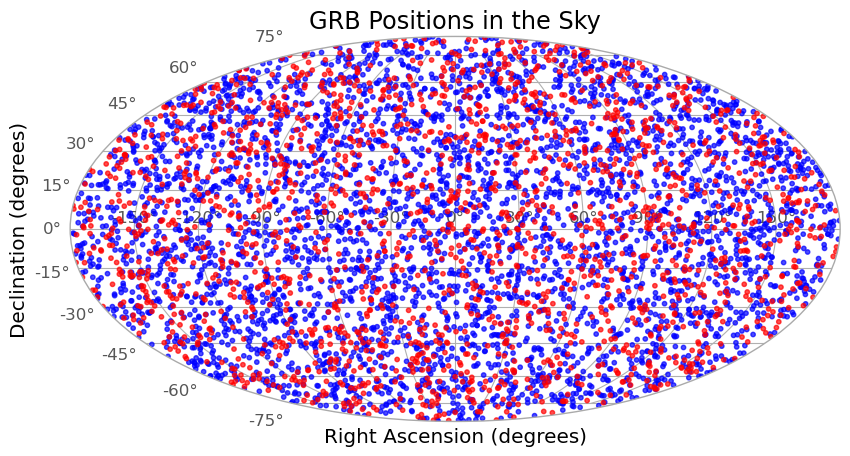

In [240]:
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.visualization.wcsaxes import WCSAxes
plt.style.use(astropy_mpl_style)

ra = fdf['RA']
dec = fdf['DEC']

coords = SkyCoord(ra=ra.values * u.degree, dec=dec.values * u.degree, frame='icrs')

plt.figure(figsize=(10, 5))
plt.subplot(projection='mollweide')
colors = fdf['Telescope'].map({'Batse': 'red', 'Fermi': 'blue'})

plt.scatter(coords.ra.wrap_at(180 * u.deg).radian, coords.dec.radian, s=10, c=colors, marker='o', alpha=0.7)

plt.grid(True)
plt.title('GRB Positions in the Sky')
plt.xlabel('Right Ascension (degrees)')
plt.ylabel('Declination (degrees)')

plt.show()


In [241]:
print("available columns", fdf.columns)
custom_drop = ["Name","RA","DEC","T90","Telescope","TRIGGER_NUM","µ_Z_H06","µ_Z_L08","µ_Z_B10"]
# custom_drop = ["TRIGGER_NUM","TIME","RA","T90", "T50","DEC","T50_ERROR","T90_ERROR",'FLUX_64_ERROR', 'FLUX_256_ERROR','FLUX_1024_ERROR','FLUENCE_1_ERROR','FLUENCE_2_ERROR','FLUENCE_3_ERROR','FLUENCE_4_ERROR',"PI_50%","PI_90%","µ_Z_L08","PI_50%.1","PI_90%.1","µ_Z_B10","PI_50%.2","PI_90%.2"]

print("dropped columns", fdf.columns)

fdf_filtred = fdf.drop(columns=custom_drop, axis=1)
fdf_filtred.describe()


available columns Index(['Name', 'RA', 'DEC', 'T90', 'Fluence', 'Flux_64', 'Flux_256',
       'Flux_1024', 'Telescope', 'TRIGGER_NUM', 'µ_Z_H06', 'µ_Z_L08',
       'µ_Z_B10'],
      dtype='object')
dropped columns Index(['Name', 'RA', 'DEC', 'T90', 'Fluence', 'Flux_64', 'Flux_256',
       'Flux_1024', 'Telescope', 'TRIGGER_NUM', 'µ_Z_H06', 'µ_Z_L08',
       'µ_Z_B10'],
      dtype='object')


Fluence      Flux_64     Flux_256    Flux_1024
count  5.953000e+03  5953.000000  5953.000000  5953.000000
mean   7.136640e-06     5.841612     4.727521     3.489244
std    1.386040e-04    21.936811    20.249227    17.802016
min    0.000000e+00     0.000000     0.000000    -0.002200
25%    4.062500e-07     1.450800     0.998400     0.630000
50%    1.338300e-06     2.450900     1.742800     1.141000
75%    3.991000e-06     4.772200     3.677400     2.561000
max    1.056800e-02  1064.060000  1034.760000   995.883000

In [242]:
from scipy.stats import median_abs_deviation

# Normalize by median and MAD
if normalize :
    fdf_filtred = (fdf_filtred - fdf_filtred.median()) / median_abs_deviation(fdf_filtred, scale='normal')

In [243]:
# # Normalize by mean (z-score normalization)
# fdf = (fdf - fdf.mean()) / fdf.std()

# print("\nNormalized by Mean (Z-Score):")
# print(fdf)

In [244]:
fdf_filtred

Fluence   Flux_64  Flux_256  Flux_1024
0    -0.718031 -0.992851 -0.851481  -0.771706
1     7.288692  4.696286  5.494278   7.187564
2    -0.260154  0.086440  0.147006   0.344308
3    -0.286808  0.012947  0.106480   0.003324
4     0.061915  0.324486  0.807322   1.311589
...        ...       ...       ...        ...
5948  0.097074 -0.879926 -0.815371  -0.658495
5949 -0.757937  0.327226 -0.551842  -0.918154
5950 -0.762909 -0.804714 -0.783320  -1.009553
5951  4.834899 -0.360963 -0.041880   0.479849
5952 -0.413774 -0.474856 -0.291163  -0.316784

[5953 rows x 4 columns]

In [245]:
mean = fdf_filtred["Fluence"].mean()
std = fdf_filtred["Fluence"].std()

fdf_filtred_mask = (fdf_filtred["Fluence"] >= (mean - std)) & (fdf_filtred["Fluence"] <= (mean + std))


In [246]:
fdf_filtred_mask

0       True
1       True
2       True
3       True
4       True
        ... 
5948    True
5949    True
5950    True
5951    True
5952    True
Name: Fluence, Length: 5953, dtype: bool

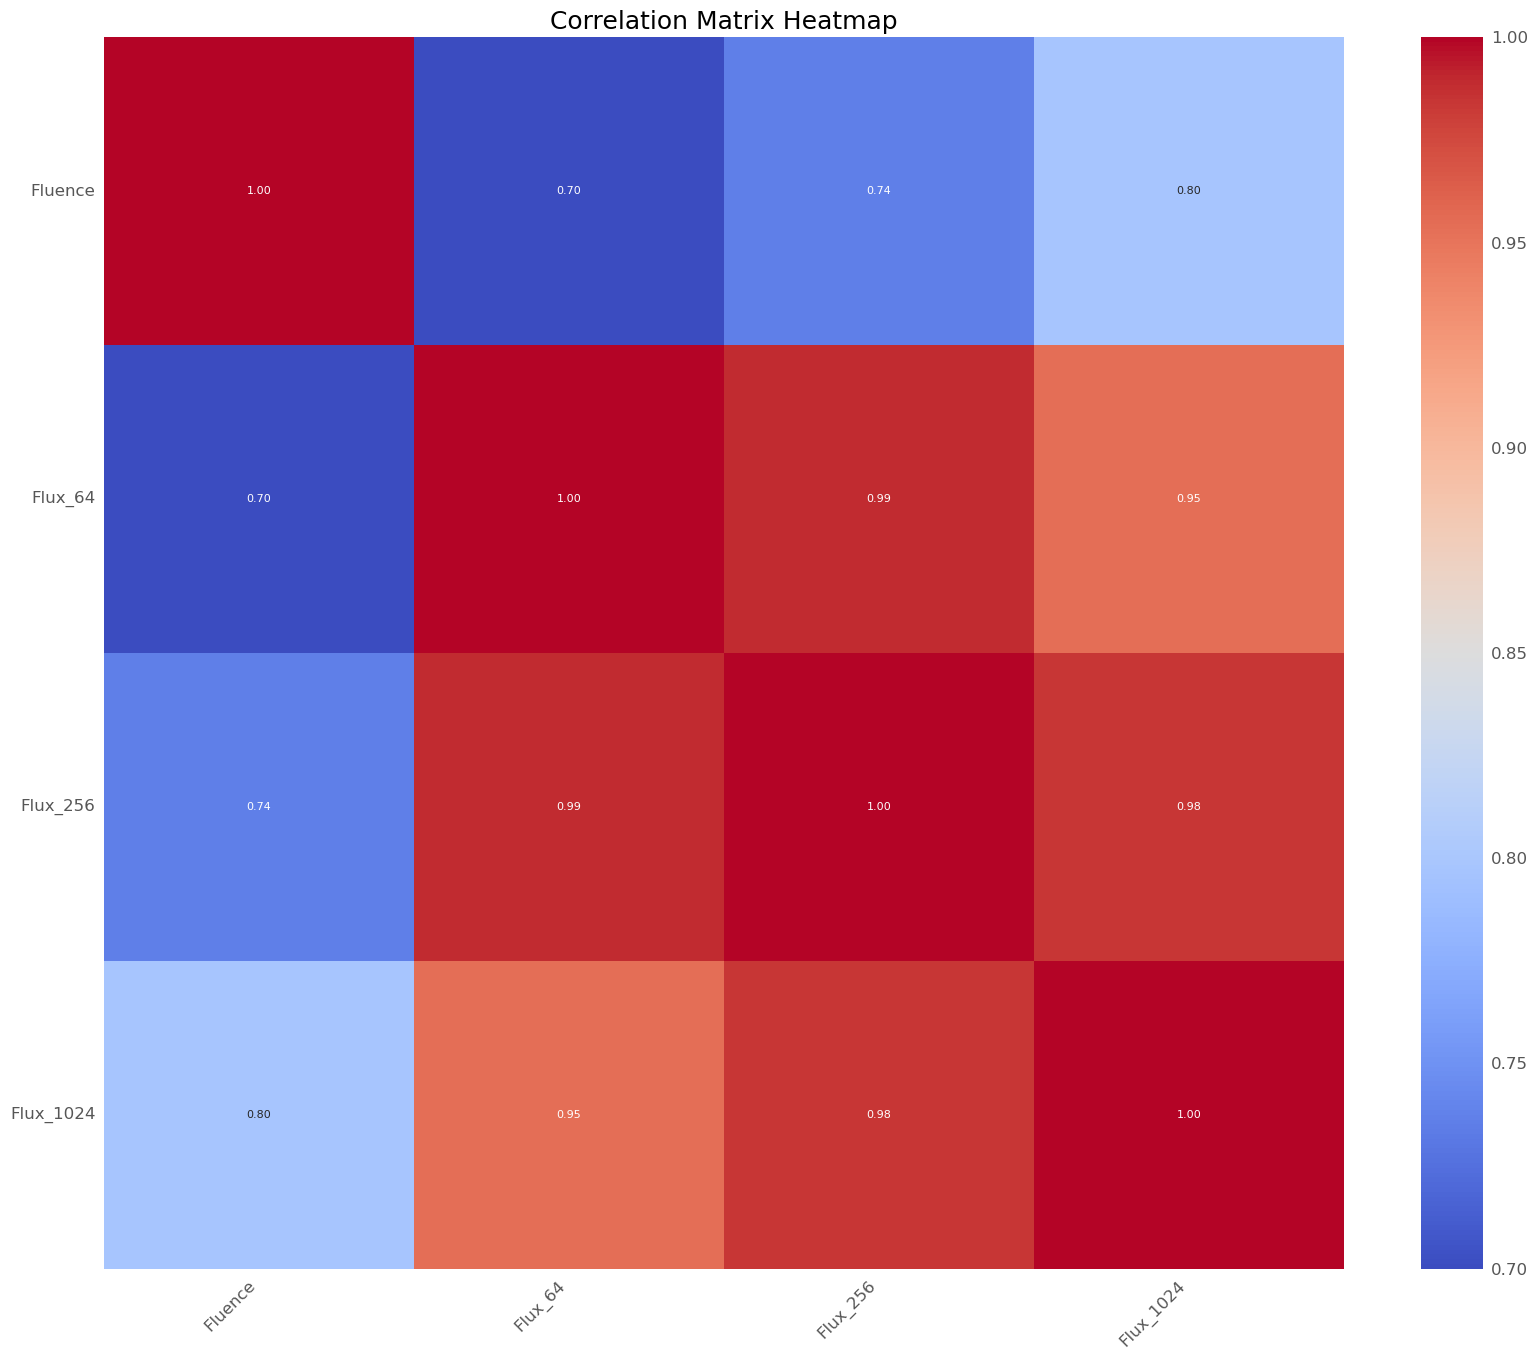

In [247]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = fdf_filtred.corr()

# Create a heatmap with larger figure size and better label handling
plt.figure(figsize=(20, 16))  # Adjust width and height as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            annot_kws={"size": 8})  # Smaller text for annotations
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)
plt.title("Correlation Matrix Heatmap", fontsize=18)
plt.show()


In [248]:
tempDF = fdf_filtred


In [249]:
tempDF.columns

Index(['Fluence', 'Flux_64', 'Flux_256', 'Flux_1024'], dtype='object')

In [250]:
fdf_filtred = tempDF
fdf_filtred

Fluence   Flux_64  Flux_256  Flux_1024
0    -0.718031 -0.992851 -0.851481  -0.771706
1     7.288692  4.696286  5.494278   7.187564
2    -0.260154  0.086440  0.147006   0.344308
3    -0.286808  0.012947  0.106480   0.003324
4     0.061915  0.324486  0.807322   1.311589
...        ...       ...       ...        ...
5948  0.097074 -0.879926 -0.815371  -0.658495
5949 -0.757937  0.327226 -0.551842  -0.918154
5950 -0.762909 -0.804714 -0.783320  -1.009553
5951  4.834899 -0.360963 -0.041880   0.479849
5952 -0.413774 -0.474856 -0.291163  -0.316784

[5953 rows x 4 columns]

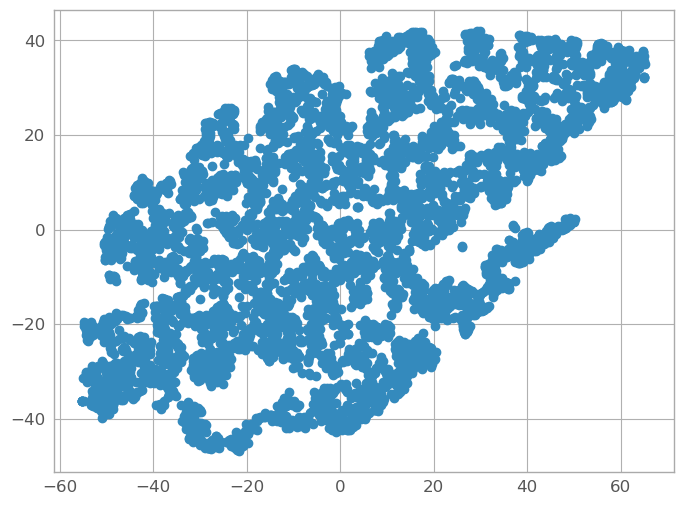

In [251]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=50,early_exaggeration=50,perplexity=50)
# tsne = TSNE(n_components=2, random_state=20,early_exaggeration=50,perplexity=30)
tsne_result = tsne.fit_transform(fdf_filtred)

# Convert the result to a DataFrame for further analysis
tsne_df = pd.DataFrame(tsne_result, columns=['x', 'y'],index=fdf.index)
plt.scatter(tsne_df.x,tsne_df.y)

In [252]:
fdf

Name        RA      DEC      T90  \
0     GRB120403857                     55.3384 -89.0093    4.288   
1     GRB120227725                    256.7300 -88.8600   17.408   
2     GRB230524357                     13.0800 -87.7700   11.008   
3     GRB141205018                    294.6100 -87.5800   13.056   
4     GRB180630467                     48.9589 -87.4785   12.032   
...                              ...       ...      ...      ...   
5948            4B 930313              35.8000  86.0600   42.208   
5949            4B 941113             197.8200  86.1900    0.078   
5950            4B 950221-            204.2200  86.8000    0.344   
5951            4B 921008             257.6100  87.1800  109.824   
5952            4B 940716-            127.1900  88.1000   11.264   

           Fluence  Flux_64  Flux_256  Flux_1024 Telescope  TRIGGER_NUM  \
0     1.252400e-07   0.6028    0.5473     0.3980     Fermi            0   
1     1.365200e-05  11.1926    9.4569     8.0612     Fermi            0   
2     8.987900e-07   2.6118    1.9492     1.4725     Fermi            0   
3     8.537600e-07   2.4750    1.8923     1.1442     Fermi            0   
4     1.442900e-06   3.0549    2.8763     2.4038     Fermi            0   
...            ...      ...       ...        ...       ...          ...   
5948  1.502300e-06   0.8130    0.5980     0.5070     Batse         2240   
5949  5.782160e-08   3.0600    0.9680     0.2570     Batse         3282   
5950  4.942280e-08   0.9530    0.6430     0.1690     Batse         3437   
5951  9.506500e-06   1.7790    1.6840     1.6030     Batse         1982   
5952  6.392600e-07   1.5670    1.3340     0.8360     Batse         3085   

      µ_Z_H06  µ_Z_L08  µ_Z_B10  
0        0.00     0.00     0.00  
1        0.00     0.00     0.00  
2        0.00     0.00     0.00  
3        0.00     0.00     0.00  
4        0.00     0.00     0.00  
...       ...      ...      ...  
5948     1.63     2.22     2.61  
5949     0.00     0.00     0.00  
5950     0.00     0.00     0.00  
5951     1.49     1.81     2.52  
5952     1.14     1.38     1.64  

[5953 rows x 13 columns]

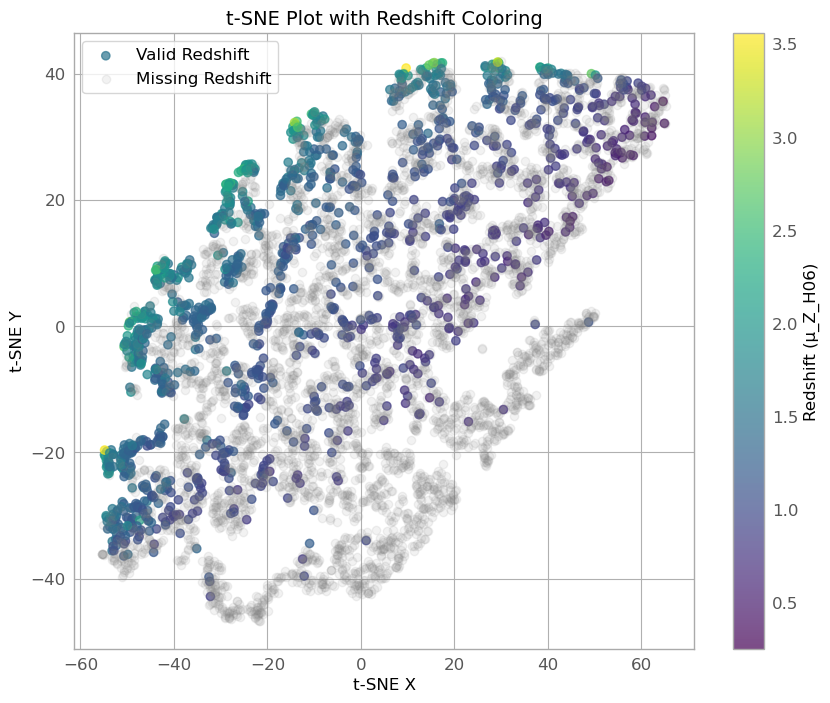

In [253]:
redshift_values = fdf.loc[tsne_df.index, 'µ_Z_H06']

redshift_values.loc[redshift_values[redshift_values==0].index] = np.nan

missing_redshift_mask = redshift_values.isna()

plt.figure(figsize=(10, 8))

# Plot points with valid redshift values
scatter = plt.scatter(
    tsne_df.loc[~missing_redshift_mask, 'x'],  # x values for valid redshift
    tsne_df.loc[~missing_redshift_mask, 'y'],  # y values for valid redshift
    c=redshift_values.loc[~missing_redshift_mask],  # Color by redshift
    cmap='viridis',  # Colormap for redshift
    alpha=0.7,  # Transparency
    label='Valid Redshift'
)

# Plot points with missing redshift values in grey
plt.scatter(
    tsne_df.loc[missing_redshift_mask, 'x'],  # x values for missing redshift
    tsne_df.loc[missing_redshift_mask, 'y'],  # y values for missing redshift
    c='grey',  # Grey color
    alpha=0.1,  # Transparency
    label='Missing Redshift'
)

# Add a colorbar for the redshift values
cbar = plt.colorbar(scatter, label='Redshift (µ_Z_H06)')
cbar.set_label('Redshift (µ_Z_H06)', fontsize=12)

# Add labels and title
plt.xlabel('t-SNE X', fontsize=12)
plt.ylabel('t-SNE Y', fontsize=12)
plt.title('t-SNE Plot with Redshift Coloring', fontsize=14)

# Add a legend
plt.legend()

# Show the plot
plt.show()


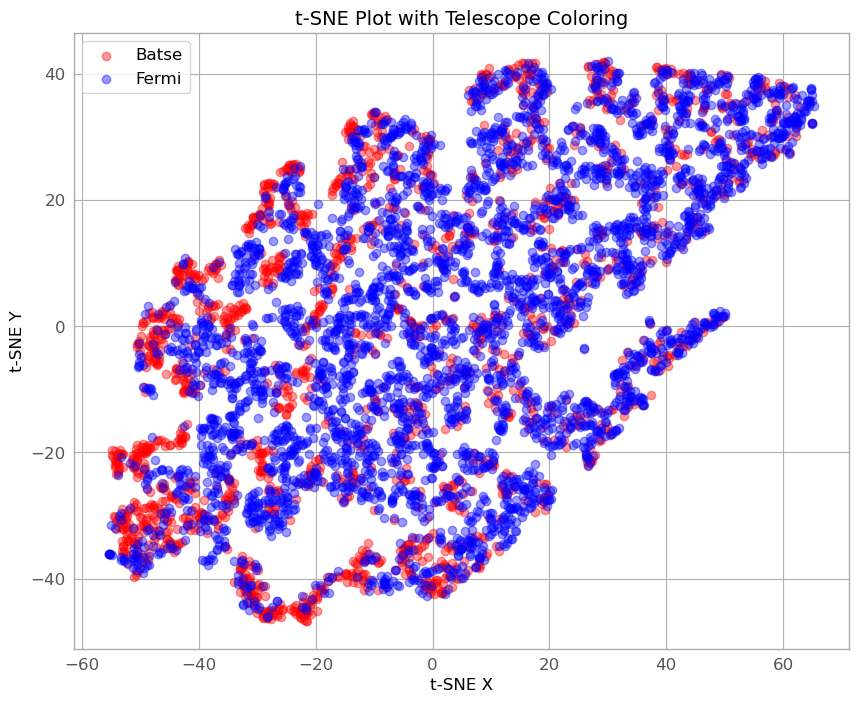

In [254]:
Telescope = fdf.loc[tsne_df.index, 'Telescope']

# Assign colors
colors = Telescope.map({'Fermi': 'blue', 'Batse': 'red'})

missing_redshift_mask = colors.isna()

plt.figure(figsize=(10, 8))

# Plot Batse
plt.scatter(
    tsne_df.loc[(~missing_redshift_mask) & (Telescope == "Batse"), 'x'],
    tsne_df.loc[(~missing_redshift_mask) & (Telescope == "Batse"), 'y'],
    color='red',
    alpha=0.4,
    label='Batse'
)

# Plot Fermi
plt.scatter(
    tsne_df.loc[(~missing_redshift_mask) & (Telescope == "Fermi"), 'x'],
    tsne_df.loc[(~missing_redshift_mask) & (Telescope == "Fermi"), 'y'],
    color='blue',
    alpha=0.4,
    label='Fermi'
)

# Labels and title
plt.xlabel('t-SNE X', fontsize=12)
plt.ylabel('t-SNE Y', fontsize=12)
plt.title('t-SNE Plot with Telescope Coloring', fontsize=14)

# Add legend
plt.legend()

plt.show()


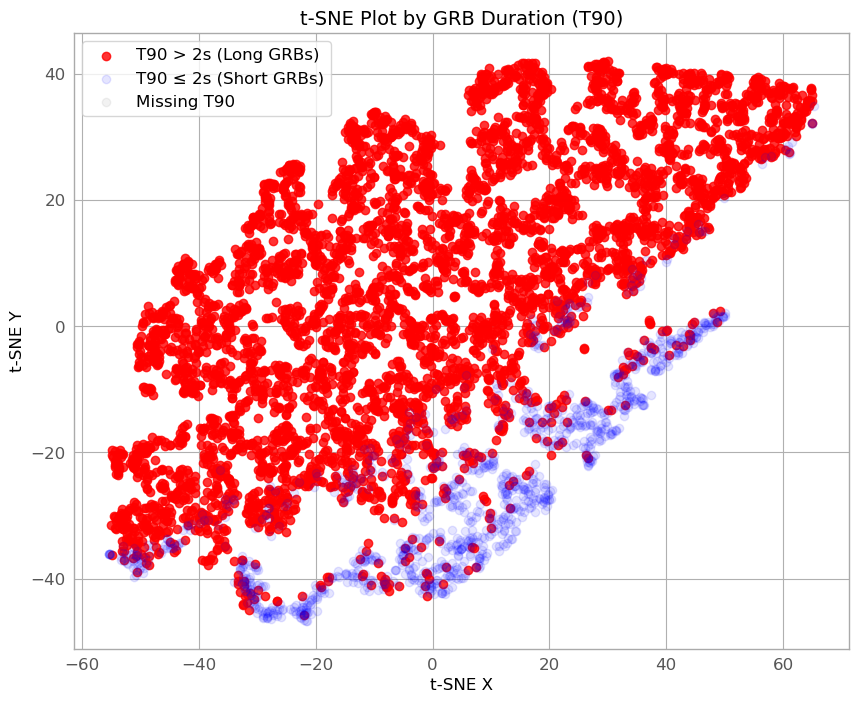

In [255]:
T90 = fdf.loc[tsne_df.index, 'T90']

# Create masks
long_mask = T90 > 2
short_mask = T90 <= 2
missing_mask = T90.isna()

plt.figure(figsize=(10, 8))

# Plot long-duration bursts (>2s) in red
plt.scatter(
    tsne_df.loc[long_mask, 'x'],
    tsne_df.loc[long_mask, 'y'],
    color='red',
    alpha=0.8,
    label='T90 > 2s (Long GRBs)'
)

# Plot short-duration bursts (<=2s) in blue
plt.scatter(
    tsne_df.loc[short_mask, 'x'],
    tsne_df.loc[short_mask, 'y'],
    color='blue',
    alpha=0.1,
    label='T90 ≤ 2s (Short GRBs)'
)

# Plot missing values (optional)
plt.scatter(
    tsne_df.loc[missing_mask, 'x'],
    tsne_df.loc[missing_mask, 'y'],
    color='gray',
    alpha=0.1,
    label='Missing T90'
)

# Add labels and title
plt.xlabel('t-SNE X', fontsize=12)
plt.ylabel('t-SNE Y', fontsize=12)
plt.title('t-SNE Plot by GRB Duration (T90)', fontsize=14)

# Add legend
plt.legend()

plt.show()


In [256]:
def investigate_column(column = "T90", threshold = 2.0) :
    data = fdf.loc[tsne_df.index, column]

    # Create masks
    above_mask = data > threshold
    below_mask = data <= threshold
    missing_mask = data.isna()

    plt.figure(figsize=(10, 8))

    # Plot long-duration bursts (>2s) in red
    plt.scatter(
        tsne_df.loc[above_mask, 'x'],
        tsne_df.loc[above_mask, 'y'],
        color='red',
        alpha=0.7,
        label=f'{column} > {threshold}'
    )

    # Plot short-duration bursts (<=2s) in blue
    plt.scatter(
        tsne_df.loc[below_mask, 'x'],
        tsne_df.loc[below_mask, 'y'],
        color='blue',
        alpha=0.7,
        label=f'{column} < {threshold}'
    )

    # Plot missing values (optional)
    plt.scatter(
        tsne_df.loc[missing_mask, 'x'],
        tsne_df.loc[missing_mask, 'y'],
        color='gray',
        alpha=0.5,
        label=f'Missing {column}'
    )

    # Add labels and title
    plt.xlabel('t-SNE X', fontsize=12)
    plt.ylabel('t-SNE Y', fontsize=12)
    plt.title(f't-SNE Plot by {column} over and below threshold value of {threshold}', fontsize=14)

    # Add legend
    plt.legend()

    plt.show()

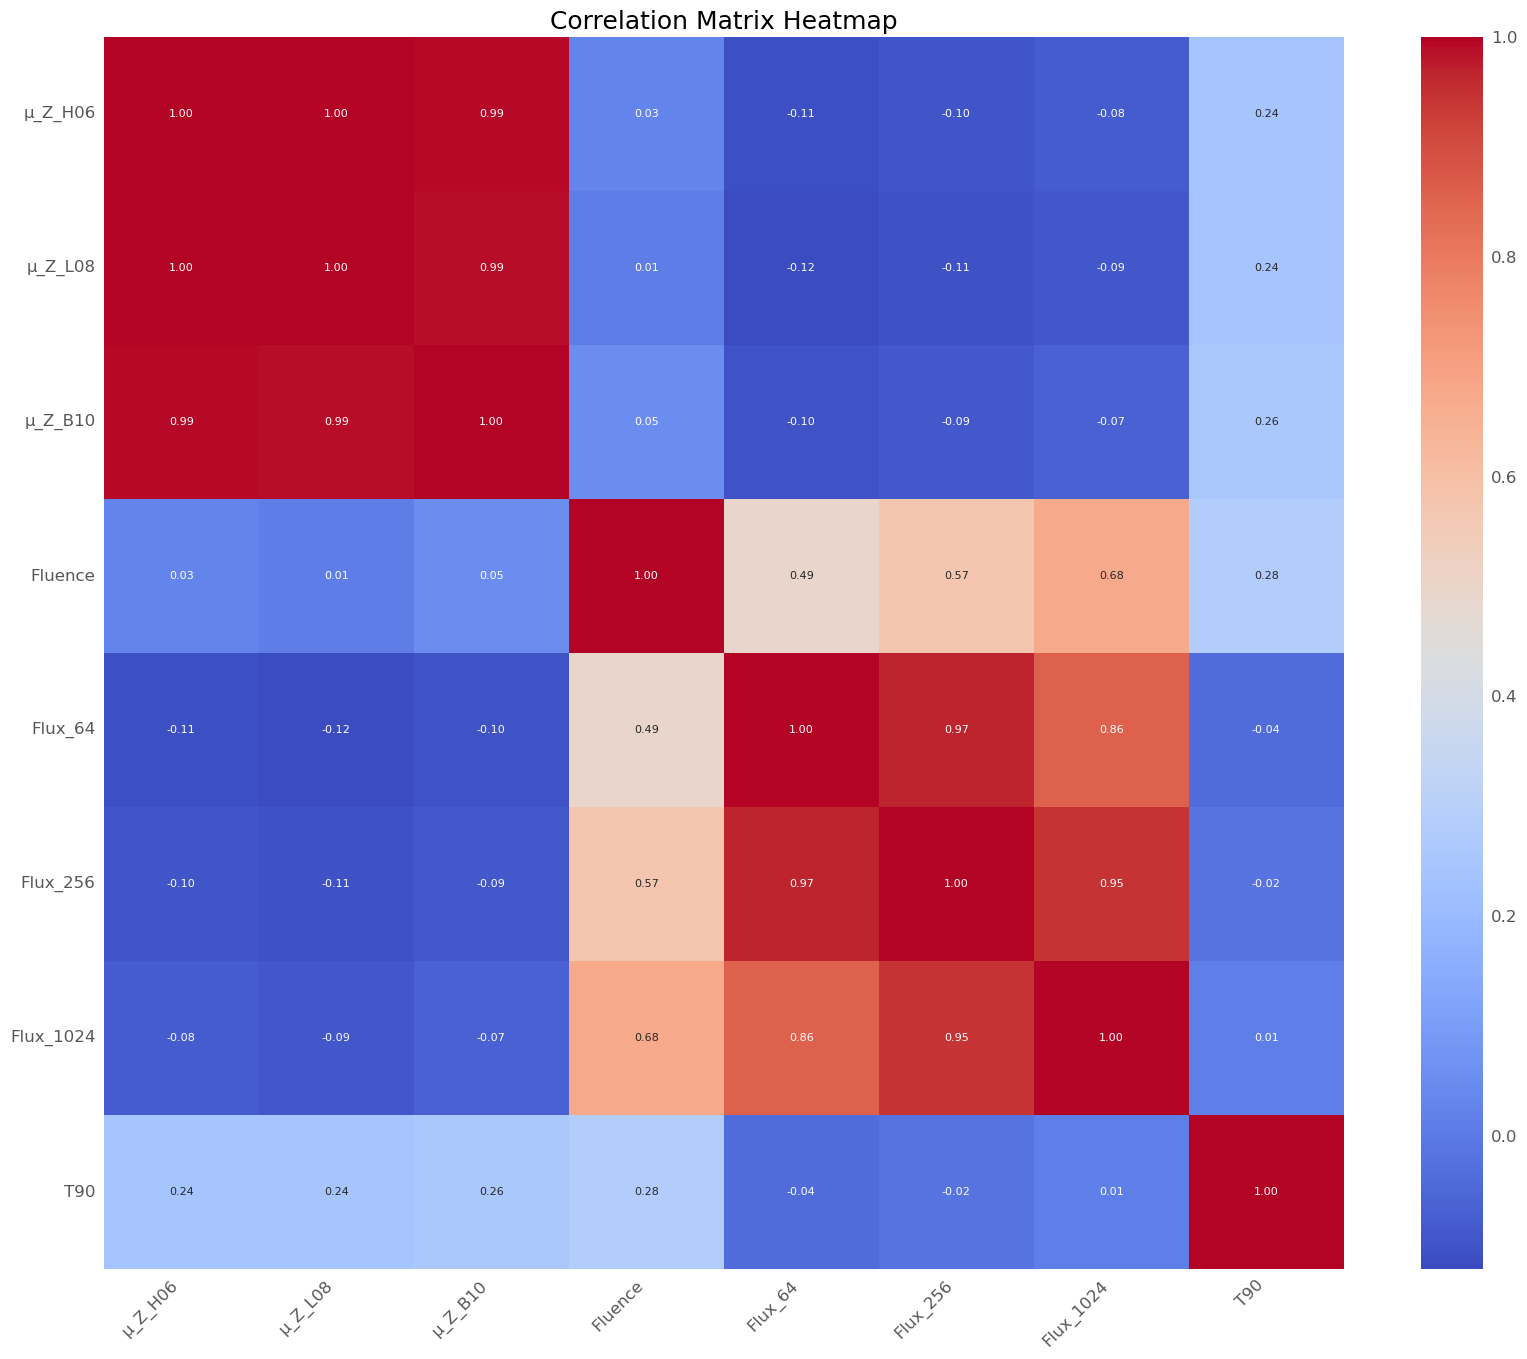

In [257]:
mean = fdf_filtred["Fluence"].mean()
std = fdf_filtred["Fluence"].std()

fdf_filtred_mask = (fdf_filtred["Fluence"] >= (mean - std)) & (fdf_filtred["Fluence"] <= (mean + std))
# Compute the correlation matrix
corr_matrix = fdf[fdf_filtred_mask][['µ_Z_H06', 'µ_Z_L08', 'µ_Z_B10',"Fluence","Flux_64","Flux_256","Flux_1024","T90"]].corr()


# Create a heatmap with larger figure size and better label handling
plt.figure(figsize=(20, 16))  # Adjust width and height as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            annot_kws={"size": 8})  # Smaller text for annotations
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)
plt.title("Correlation Matrix Heatmap", fontsize=18)
plt.show()

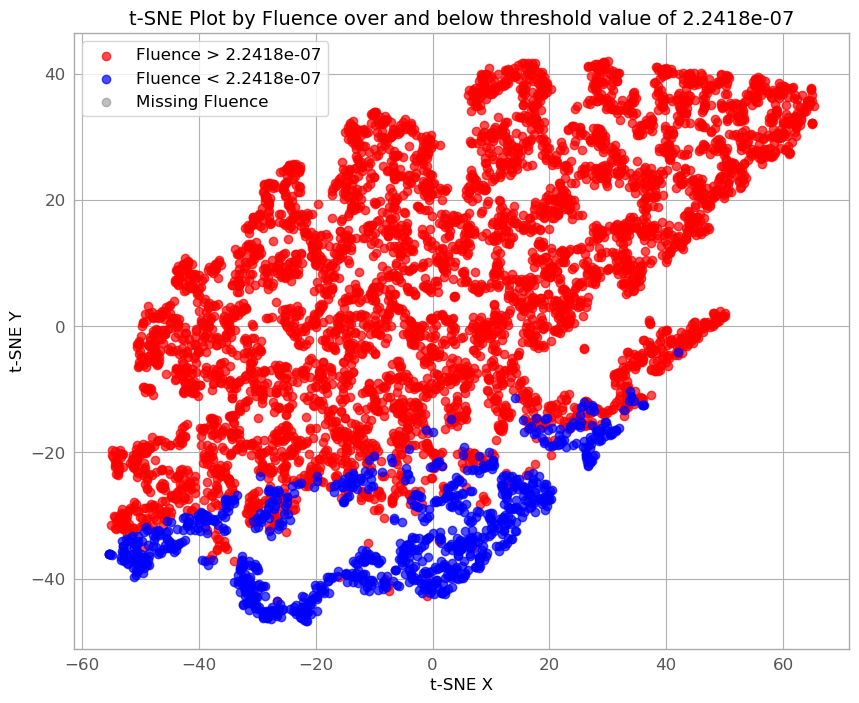

In [258]:
investigate_column(column = "Fluence", threshold = 2.2418e-07) 

In [259]:
fdf.describe()

RA          DEC          T90       Fluence      Flux_64  \
count  5953.000000  5953.000000  5953.000000  5.953000e+03  5953.000000   
mean    179.640642     0.752777    37.180525  7.136640e-06     5.841612   
std     103.570910    40.351261    58.010097  1.386040e-04    21.936811   
min       0.000000   -89.009300     0.000000  0.000000e+00     0.000000   
25%      91.700000   -30.570000     4.285000  4.062500e-07     1.450800   
50%     180.000000     0.940000    18.752000  1.338300e-06     2.450900   
75%     269.140000    32.740000    46.849000  3.991000e-06     4.772200   
max     359.740000    89.183600   984.084000  1.056800e-02  1064.060000   

          Flux_256    Flux_1024  TRIGGER_NUM      µ_Z_H06      µ_Z_L08  \
count  5953.000000  5953.000000       5953.0  5953.000000  5953.000000   
mean      4.727521     3.489244  1454.231648     0.291344     0.362167   
std      20.249227    17.802016  2473.890798     0.572373     0.733081   
min       0.000000    -0.002200          0.0     0.000000     0.000000   
25%       0.998400     0.630000          0.0     0.000000     0.000000   
50%       1.742800     1.141000          0.0     0.000000     0.000000   
75%       3.677400     2.561000       2393.0     0.000000     0.000000   
max    1034.760000   995.883000       8121.0     3.560000     4.850000   

           µ_Z_B10  
count  5953.000000  
mean      0.460212  
std       0.915168  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       5.850000

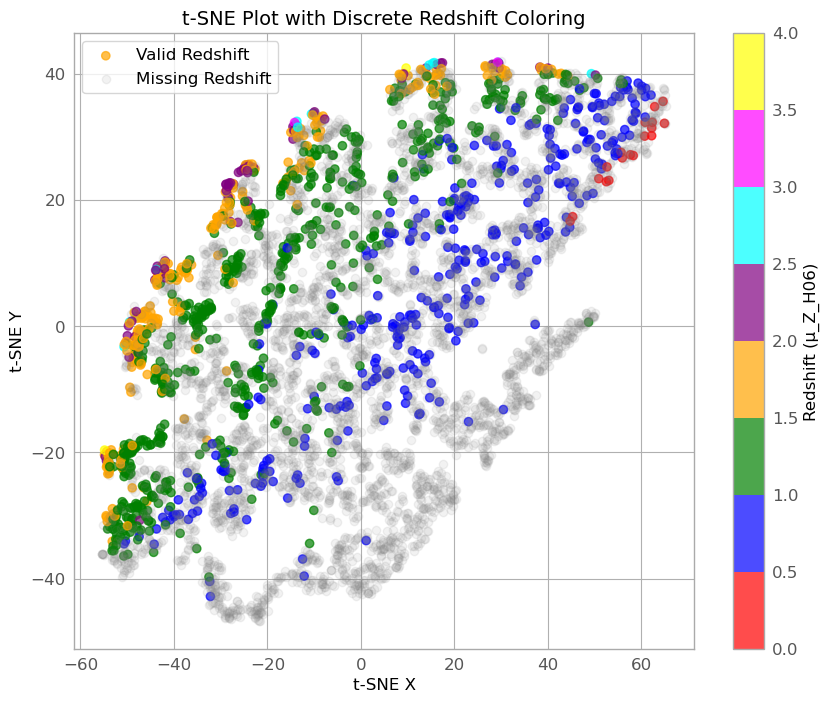

In [260]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import BoundaryNorm, ListedColormap

# Create a mask for missing redshift values
missing_redshift_mask = redshift_values.isna()

# Define the color bins and corresponding colors
bin_edges = np.arange(0, redshift_values.max() + 0.5, 0.5)  # Bins every 0.5
colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'brown', 'pink','gold',"olive"]  # Add more colors if needed
cmap = ListedColormap(colors[:len(bin_edges) - 1])  # Create a colormap
norm = BoundaryNorm(bin_edges, cmap.N)  # Normalize the bins

# Plot
plt.figure(figsize=(10, 8))

# Plot points with valid redshift values
scatter = plt.scatter(
    tsne_df.loc[~missing_redshift_mask, 'x'],  # x values for valid redshift
    tsne_df.loc[~missing_redshift_mask, 'y'],  # y values for valid redshift
    c=redshift_values.loc[~missing_redshift_mask],  # Color by redshift
    cmap=cmap,  # Use the discrete colormap
    norm=norm,  # Use the BoundaryNorm for binning
    alpha=0.7,  # Transparency
    label='Valid Redshift'
)

# Plot points with missing redshift values in grey
plt.scatter(
    tsne_df.loc[missing_redshift_mask, 'x'],  # x values for missing redshift
    tsne_df.loc[missing_redshift_mask, 'y'],  # y values for missing redshift
    c='grey',  # Grey color
    alpha=0.1,  # Transparency
    label='Missing Redshift'
)

# Add a colorbar for the redshift values
cbar = plt.colorbar(scatter, ticks=bin_edges, label='Redshift (µ_Z_H06)')
cbar.set_label('Redshift (µ_Z_H06)', fontsize=12)

# Add labels and title
plt.xlabel('t-SNE X', fontsize=12)
plt.ylabel('t-SNE Y', fontsize=12)
plt.title('t-SNE Plot with Discrete Redshift Coloring', fontsize=14)

# Add a legend
plt.legend()

# Show the plot
plt.show()

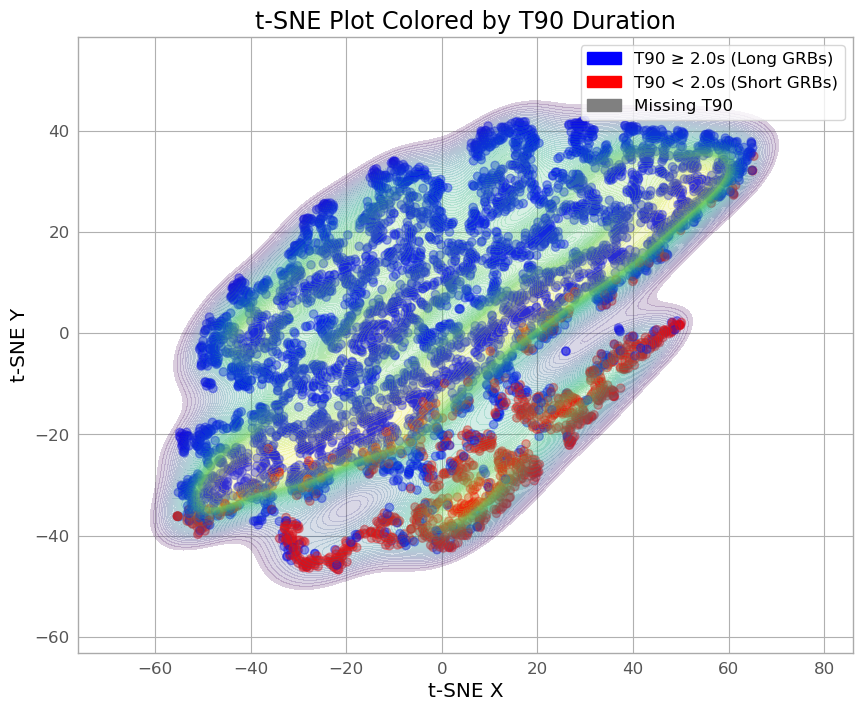

In [261]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Conditions
conditions = [
    fdf["T90"] >= 2.0,
    fdf["T90"] < 2.0,
    fdf["T90"].isna()
]

# Corresponding colors
choices = ["blue", "red", "gray"]

# Apply selection
colors = np.select(conditions, choices, default="gray")  # default fallback

# Scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(tsne_df.x, tsne_df.y, c=colors, alpha=0.4)

# Add density
sns.kdeplot(
    x=tsne_df.x, 
    y=tsne_df.y, 
    fill=True, 
    alpha=0.2,
    levels=100, 
    cmap="viridis"
)

# Add legend
import matplotlib.patches as mpatches
legend_handles = [
    mpatches.Patch(color='blue', label='T90 ≥ 2.0s (Long GRBs)'),
    mpatches.Patch(color='red', label='T90 < 2.0s (Short GRBs)'),
    mpatches.Patch(color='gray', label='Missing T90')
]

plt.legend(handles=legend_handles)
plt.xlabel('t-SNE X')
plt.ylabel('t-SNE Y')
plt.title('t-SNE Plot Colored by T90 Duration')
plt.show()


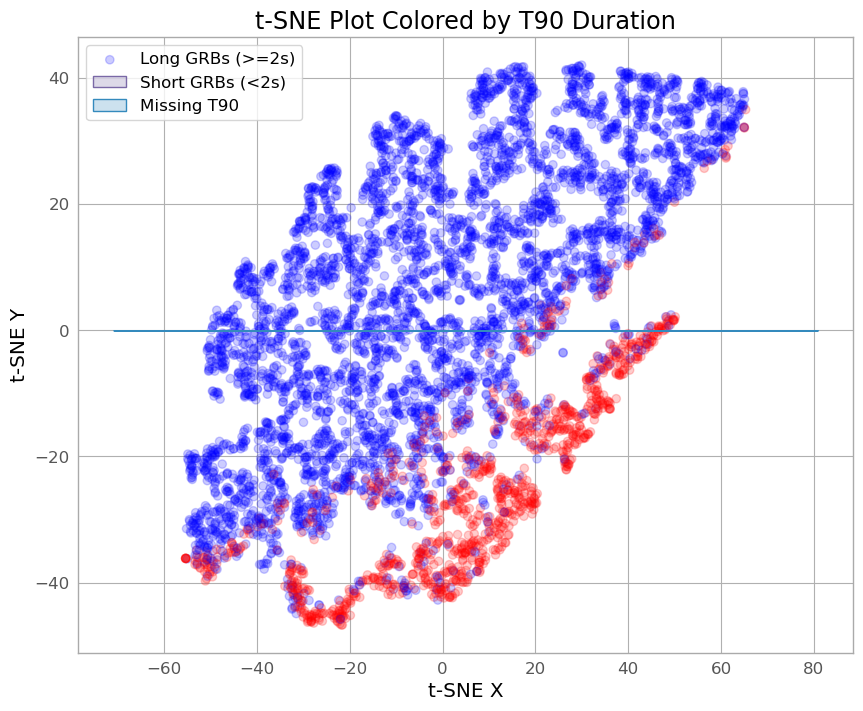

In [262]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assurer que T90 est bien numérique
fdf["T90"] = pd.to_numeric(fdf["T90"], errors='coerce')

colors = []
short_tninety = []
long_tninety = []

for GRB in fdf.index:
    if pd.isna(fdf["T90"].loc[GRB]):
        colors.append("gray")
    elif fdf["T90"].loc[GRB] >= 2.0:
        colors.append("blue")
        long_tninety.append(GRB)
    elif fdf["T90"].loc[GRB] < 2.0:
        colors.append("red")
        short_tninety.append(GRB)
    else:
        colors.append("gray")

plt.figure(figsize=(10, 8))
plt.scatter(tsne_df.x, tsne_df.y, c=colors, alpha=0.2)

# Ton KDE plot conservé tel quel
sns.kdeplot(tsne_df, fill=True)

# Ajouter une légende simple sans patch
plt.xlabel('t-SNE X')
plt.ylabel('t-SNE Y')
plt.title('t-SNE Plot Colored by T90 Duration')
plt.legend(["Long GRBs (>=2s)", "Short GRBs (<2s)", "Missing T90"], loc="best")

plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


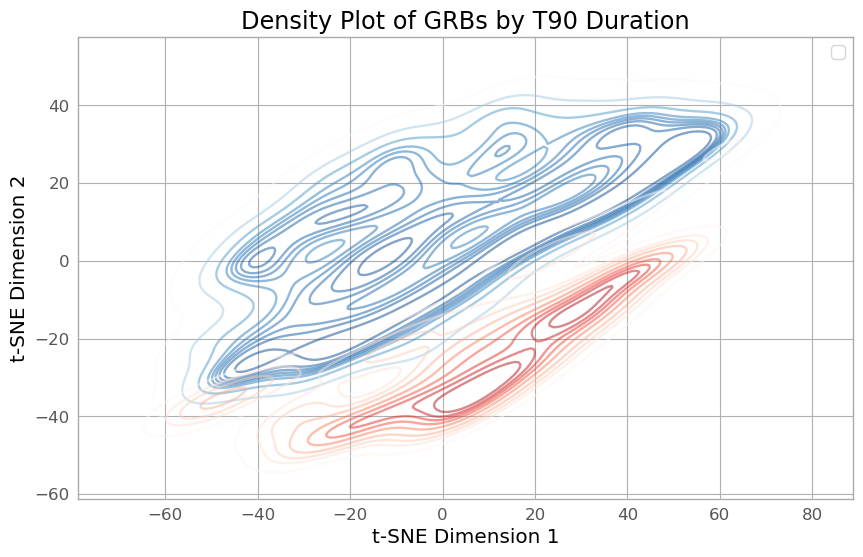

In [263]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assurer que T90 est bien numérique
fdf["T90"] = pd.to_numeric(fdf["T90"], errors='coerce')

plt.figure(figsize=(10, 6))

# Population 1: Long GRBs (T90 >= 2.0)
sns.kdeplot(
    x=tsne_df.x.loc[fdf["T90"] >= 2.0],
    y=tsne_df.y.loc[fdf["T90"] >= 2.0],
    fill=False,
    cmap="Blues",
    label='Long GRBs (T90 ≥ 2.0)',
    alpha=0.5
)

# Population 2: Short GRBs (T90 < 2.0)
sns.kdeplot(
    x=tsne_df.x.loc[fdf["T90"] < 2.0],
    y=tsne_df.y.loc[fdf["T90"] < 2.0],
    fill=False,
    cmap="Reds",
    label='Short GRBs (T90 < 2.0)',
    alpha=0.5
)

plt.title('Density Plot of GRBs by T90 Duration')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()

plt.show()


In [264]:
fdf_filtred

Fluence   Flux_64  Flux_256  Flux_1024
0    -0.718031 -0.992851 -0.851481  -0.771706
1     7.288692  4.696286  5.494278   7.187564
2    -0.260154  0.086440  0.147006   0.344308
3    -0.286808  0.012947  0.106480   0.003324
4     0.061915  0.324486  0.807322   1.311589
...        ...       ...       ...        ...
5948  0.097074 -0.879926 -0.815371  -0.658495
5949 -0.757937  0.327226 -0.551842  -0.918154
5950 -0.762909 -0.804714 -0.783320  -1.009553
5951  4.834899 -0.360963 -0.041880   0.479849
5952 -0.413774 -0.474856 -0.291163  -0.316784

[5953 rows x 4 columns]

In [265]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd

# Example DataFrame setup:
# Features: fluence, flux64, flux256, flux1024
# Target: 0 = short, 1 = long
X = fdf[['Fluence', 'Flux_64', 'Flux_256', 'Flux_1024']]
y = (fdf['T90'] >= 2.0).astype(int)  # 1 for long, 0 for short

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict probabilities
probs = clf.predict_proba(X_test)

# Show probability for the first 5 bursts
for i, p in enumerate(probs[:5]):
    print(f"GRB {i+1}: Probability Short = {p[0]:.2%}, Probability Long = {p[1]:.2%}")

# Evaluation
print(classification_report(y_test, clf.predict(X_test)))


GRB 1: Probability Short = 94.00%, Probability Long = 6.00%
GRB 2: Probability Short = 3.00%, Probability Long = 97.00%
GRB 3: Probability Short = 96.00%, Probability Long = 4.00%
GRB 4: Probability Short = 0.00%, Probability Long = 100.00%
GRB 5: Probability Short = 99.00%, Probability Long = 1.00%
              precision    recall  f1-score   support

           0       0.86      0.79      0.82       348
           1       0.95      0.97      0.96      1438

    accuracy                           0.93      1786
   macro avg       0.90      0.88      0.89      1786
weighted avg       0.93      0.93      0.93      1786



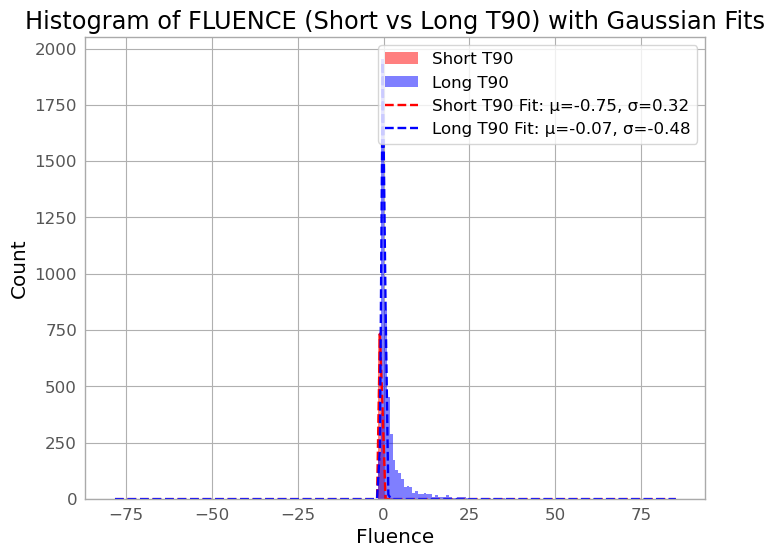

In [266]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm

# Define the Gaussian function
def gaussian(x, amp, mean, std):
    return amp * np.exp(-0.5 * ((x - mean) / std) ** 2)

# Define the parameter and bin edges
parameter = fdf_filtred.Fluence
bin_edges = np.linspace(
    parameter.mean() - parameter.std(),  # Lower bound
    parameter.mean() + parameter.std(),  # Upper bound
    num=201  # Number of bin edges (200 bins)
)

# Compute histograms
hist_short, bin_edges = np.histogram(parameter.loc[short_tninety], bins=bin_edges)
hist_long, _ = np.histogram(parameter.loc[long_tninety], bins=bin_edges)

# Bin centers for fitting
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Fit Gaussian to short_tninety
popt_short, pcov_short = curve_fit(gaussian, bin_centers, hist_short, p0=[max(hist_short), np.mean(parameter.loc[short_tninety]), np.std(parameter.loc[short_tninety])])
amp_short, mean_short, std_short = popt_short

# Fit Gaussian to long_tninety
popt_long, pcov_long = curve_fit(gaussian, bin_centers, hist_long, p0=[max(hist_long), np.mean(parameter.loc[long_tninety]), np.std(parameter.loc[long_tninety])])
amp_long, mean_long, std_long = popt_long

# Plot the histograms
plt.hist(parameter.loc[short_tninety], bins=bin_edges, color="red", alpha=0.5, label="Short T90")
plt.hist(parameter.loc[long_tninety], bins=bin_edges, color="blue", alpha=0.5, label="Long T90")

# Plot the Gaussian fits
plt.plot(bin_centers, gaussian(bin_centers, *popt_short), color="red", linestyle="--", label=f"Short T90 Fit: μ={mean_short:.2f}, σ={std_short:.2f}")
plt.plot(bin_centers, gaussian(bin_centers, *popt_long), color="blue", linestyle="--", label=f"Long T90 Fit: μ={mean_long:.2f}, σ={std_long:.2f}")

# Add labels and legend
plt.xlabel(parameter.name)
plt.ylabel("Count")
plt.title("Histogram of FLUENCE (Short vs Long T90) with Gaussian Fits")
plt.legend()

# Show the plot
plt.show()

In [267]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm

# Define the Gaussian function
def gaussian(x, amp, mean, std):
    return amp * np.exp(-0.5 * ((x - mean) / std) ** 2)

# Function to fit Gaussian and return parameters
def fit_gaussian(parameter, data_short, data_long, num_bins=201):
    # Define bin edges
    bin_edges = np.linspace(
        parameter.mean() - parameter.std(),  # Lower bound
        parameter.mean() + parameter.std(),  # Upper bound
        num=num_bins  # Number of bin edges
    )
    
    # Compute histograms
    hist_short, _ = np.histogram(data_short, bins=bin_edges)
    hist_long, _ = np.histogram(data_long, bins=bin_edges)
    
    # Bin centers for fitting
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    

    popt_short, _ = curve_fit(
    gaussian, bin_centers, hist_short,
    p0=[max(hist_short), np.mean(data_short), np.std(data_short)],
    bounds=([0, -np.inf, 1e-5], [np.inf, np.inf, np.inf])
    )

    popt_long, _ = curve_fit(
        gaussian, bin_centers, hist_long,
        p0=[max(hist_long), np.mean(data_long), np.std(data_long)],
        bounds=([0, -np.inf, 1e-5], [np.inf, np.inf, np.inf])
    )
    amp_short, mean_short, std_short = popt_short
    amp_long, mean_long, std_long = popt_long
    
    return {
        'short': {'mean': mean_short, 'std': std_short},
        'long': {'mean': mean_long, 'std': std_long}
    }

# Fit Gaussian distributions for each parameter
parameters = {
    'FLUX_64': fdf.Flux_64,
    'FLUX_256': fdf.Flux_256,
    'FLUX_1024': fdf.Flux_1024,
    'FLUENCE': fdf.Fluence *1E6
}

fitted_params = {}
for param_name, param_values in parameters.items():
    fitted_params[param_name] = fit_gaussian(param_values, param_values.loc[short_tninety], param_values.loc[long_tninety])

# Print fitted parameters
for param_name, params in fitted_params.items():
    print(f"Fitted parameters for {param_name}:")
    print(f"  Short T90: μ={params['short']['mean']:.2f}, σ={params['short']['std']:.2f}")
    print(f"  Long T90: μ={params['long']['mean']:.2f}, σ={params['long']['std']:.2f}")

RuntimeError: Optimal parameters not found: The maximum number of function evaluations is exceeded.

In [ ]:
def predict_probability(value, short_params, long_params):
    p_short = norm.pdf(value, short_params['mean'], short_params['std'])
    p_long = norm.pdf(value, long_params['mean'], long_params['std'])
    
    total = p_short + p_long
    prob_short = p_short / total
    prob_long = p_long / total
    
    return prob_short, prob_long

In [ ]:
from scipy.stats import norm
import numpy as np

def predict_grb_class(features, fitted_params):
    log_p_short = 0.0
    log_p_long = 0.0

    for param_name, value in features.items():
        short_params = fitted_params[param_name]['short']
        long_params = fitted_params[param_name]['long']

        # log probabilities instead of raw probabilities
        log_p_short += norm.logpdf(value, short_params['mean'], short_params['std'])
        log_p_long += norm.logpdf(value, long_params['mean'], long_params['std'])

    # Use log-sum-exp for numerical stability
    max_log = max(log_p_short, log_p_long)
    sum_exp = np.exp(log_p_short - max_log) + np.exp(log_p_long - max_log)

    prob_short = np.exp(log_p_short - max_log) / sum_exp
    prob_long = np.exp(log_p_long - max_log) / sum_exp

    return prob_short, prob_long

In [ ]:
fdf_filtred

Fluence   Flux_64  Flux_256  Flux_1024
0     -0.638564 -0.992851 -0.851481  -0.771706
1     11.153682  4.696286  5.494278   7.187564
2      0.035795  0.086440  0.147006   0.344308
3     -0.003461  0.012947  0.106480   0.003324
4      0.510135  0.324486  0.807322   1.311589
...         ...       ...       ...        ...
5948  -0.378488 -0.879926 -0.815371  -0.658495
5949  -0.744745  0.327226 -0.551842  -0.918154
5950  -0.746511 -0.804714 -0.783320  -1.009553
5951  -0.142465 -0.360963 -0.041880   0.479849
5952  -0.558091 -0.474856 -0.291163  -0.316784

[5953 rows x 4 columns]

In [ ]:
grb = {
    'Flux_64': 4.6962859811143682,
    'Flux_256': 5.494278122478979,     # Replace with your GRB's flux_64 value
    'Flux_1024': 7.187563857879464,    # Replace with your GRB's flux_1024 value
    'Fluence': 11.153682275095285 * 1E6    # Replace with your GRB's fluence value (remember your scaling!)
}
short_prob, long_prob = predict_grb_class(grb, fitted_params)

print(f"Probability Short = {short_prob*100:.2f}%")
print(f"Probability Long = {long_prob*100:.2f}%")

KeyError: 'mean'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import lognorm, norm

# Define the Gaussian function
def gaussian(x, amp, mean, std):
    return amp * np.exp(-0.5 * ((x - mean) / std) ** 2)

# Function to fit Gaussian and return parameters
def fit_gaussian(parameter, data_short, data_long, num_bins=201):
    # Define bin edges
    bin_edges = np.linspace(
        parameter.mean() - parameter.std(),  # Lower bound
        parameter.mean() + parameter.std(),  # Upper bound
        num=num_bins  # Number of bin edges
    )
    
    # Compute histograms
    hist_short, _ = np.histogram(data_short, bins=bin_edges)
    hist_long, _ = np.histogram(data_long, bins=bin_edges)
    
    # Bin centers for fitting
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Fit Gaussian to short_tninety
    popt_short, _ = curve_fit(gaussian, bin_centers, hist_short, p0=[max(hist_short), np.mean(data_short), np.std(data_short)])
    amp_short, mean_short, std_short = popt_short
    
    # Fit Gaussian to long_tninety
    popt_long, _ = curve_fit(gaussian, bin_centers, hist_long, p0=[max(hist_long), np.mean(data_long), np.std(data_long)])
    amp_long, mean_long, std_long = popt_long
    
    return {
        'short': {'mean': mean_short, 'std': std_short},
        'long': {'mean': mean_long, 'std': std_long}
    }

def fit_lognormal(parameter, data_short, data_long, num_bins=201):
    # Add a small positive offset to avoid numerical instability
    offset = 1e-10
    data_short = data_short + offset
    data_long = data_long + offset
    
    # Define bin edges on a logarithmic scale
    bin_edges = np.logspace(
        np.log10(data_short.min()),  # Lower bound (log scale)
        np.log10(data_short.max()),  # Upper bound (log scale)
        num=num_bins  # Number of bin edges
    )
    
    # Compute histograms
    hist_short, _ = np.histogram(data_short, bins=bin_edges)
    hist_long, _ = np.histogram(data_long, bins=bin_edges)
    
    # Bin centers for fitting
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Fit log-normal to short_tninety
    shape_short, loc_short, scale_short = lognorm.fit(data_short, floc=0)
    
    # Fit log-normal to long_tninety
    shape_long, loc_long, scale_long = lognorm.fit(data_long, floc=0)
    
    return {
        'short': {'shape': shape_short, 'loc': loc_short, 'scale': scale_short},
        'long': {'shape': shape_long, 'loc': loc_long, 'scale': scale_long}
    }

# Fit Gaussian distributions for FLUX_64 and FLUX_1024
parameters = {
    'Flux_64': fdf.Flux_64,
    'Flux_256': fdf.Flux_256,
    'Flux_1024': fdf.Flux_1024
}

fitted_params = {}
for param_name, param_values in parameters.items():
    fitted_params[param_name] = fit_gaussian(param_values, param_values.loc[short_tninety], param_values.loc[long_tninety])

fdf['Fluence'] = fdf.Fluence.clip(lower=1e-10)
# Fit log-normal distribution for FLUENCE
fitted_params['Fluence'] = fit_lognormal(fdf.Fluence, fdf.Fluence.loc[short_tninety], fdf.Fluence.loc[long_tninety])

# Print fitted parameters
for param_name, params in fitted_params.items():
    if 'std' in params['short']:  # Gaussian
        print(f"Fitted parameters for {param_name}:")
        print(f"  Short T90: μ={params['short']['mean']:.2f}, σ={params['short']['std']:.2f}")
        print(f"  Long T90: μ={params['long']['mean']:.2f}, σ={params['long']['std']:.2f}")
    else:  # Log-normal
        print(f"Fitted parameters for {param_name} (log-normal):")
        print(f"  Short T90: shape={params['short']['shape']:.2f}, loc={params['short']['loc']:.2f}, scale={params['short']['scale']:.2f}")
        print(f"  Long T90: shape={params['long']['shape']:.2f}, loc={params['long']['loc']:.2f}, scale={params['long']['scale']:.2f}")

def calculate_probability(parameter_values, fitted_params):
    """
    Calculate the probability of a given set of parameter values belonging to short or long T90.
    Supports both Gaussian and log-normal distributions.
    """
    prob_short = 1.0
    prob_long = 1.0
    
    for param_name, value in parameter_values.items():
        if param_name in fitted_params:
            if 'std' in fitted_params[param_name]['short']:  # Gaussian
                mean_short = fitted_params[param_name]['short']['mean']
                std_short = fitted_params[param_name]['short']['std']
                mean_long = fitted_params[param_name]['long']['mean']
                std_long = fitted_params[param_name]['long']['std']
                
                prob_short *= norm.pdf(value, mean_short, std_short)
                prob_long *= norm.pdf(value, mean_long, std_long)
            else:  # Log-normal
                shape_short = fitted_params[param_name]['short']['shape']
                loc_short = fitted_params[param_name]['short']['loc']
                scale_short = fitted_params[param_name]['short']['scale']
                shape_long = fitted_params[param_name]['long']['shape']
                loc_long = fitted_params[param_name]['long']['loc']
                scale_long = fitted_params[param_name]['long']['scale']
                
                # Ensure scale is positive
                if scale_short <= 0 or scale_long <= 0:
                    raise ValueError(f"Invalid scale parameter for {param_name}. Scale must be positive.")
                
                prob_short *= lognorm.pdf(value, shape_short, loc=loc_short, scale=scale_short)
                prob_long *= lognorm.pdf(value, shape_long, loc=loc_long, scale=scale_long)
    
    # Normalize probabilities
    total_prob = prob_short + prob_long
    if total_prob == 0:
        raise ValueError("Total probability is zero. Check the input values and fitted parameters.")
    
    prob_short /= total_prob
    prob_long /= total_prob
    
    return {'short_tninety': prob_short, 'long_tninety': prob_long}


# Calculate probabilities
probabilities = calculate_probability(grb, fitted_params)
print(f"Probabilities: Short T90 = {probabilities['short_tninety']:.4f}, Long T90 = {probabilities['long_tninety']:.4f}")

Fitted parameters for Flux_64:
  Short T90: μ=2.43, σ=1.52
  Long T90: μ=1.69, σ=-0.94
Fitted parameters for Flux_256:
  Short T90: μ=1.36, σ=0.83
  Long T90: μ=1.16, σ=-0.64
Fitted parameters for Flux_1024:
  Short T90: μ=0.52, σ=0.34
  Long T90: μ=0.83, σ=-0.47
Fitted parameters for Fluence (log-normal):
  Short T90: shape=1.87, loc=0.00, scale=0.00
  Long T90: shape=1.65, loc=0.00, scale=0.00
Probabilities: Short T90 = nan, Long T90 = nan
